# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Supermarket Sales Analysis</div>


The Supermarket Sales Dataset is a comprehensive collection of transaction records from a supermarket chain. It contains various details about each sale, including the customer type, product categories, sales amount, payment methods, and customer feedback in the form of ratings

## Description



Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and 

lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [9]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [10]:
df.size

17000

In [11]:
df.shape

(1000, 17)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [15]:
df.ndim

2

In [16]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [17]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [18]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_Name'] = df['Date'].dt.day_name()

<Axes: >

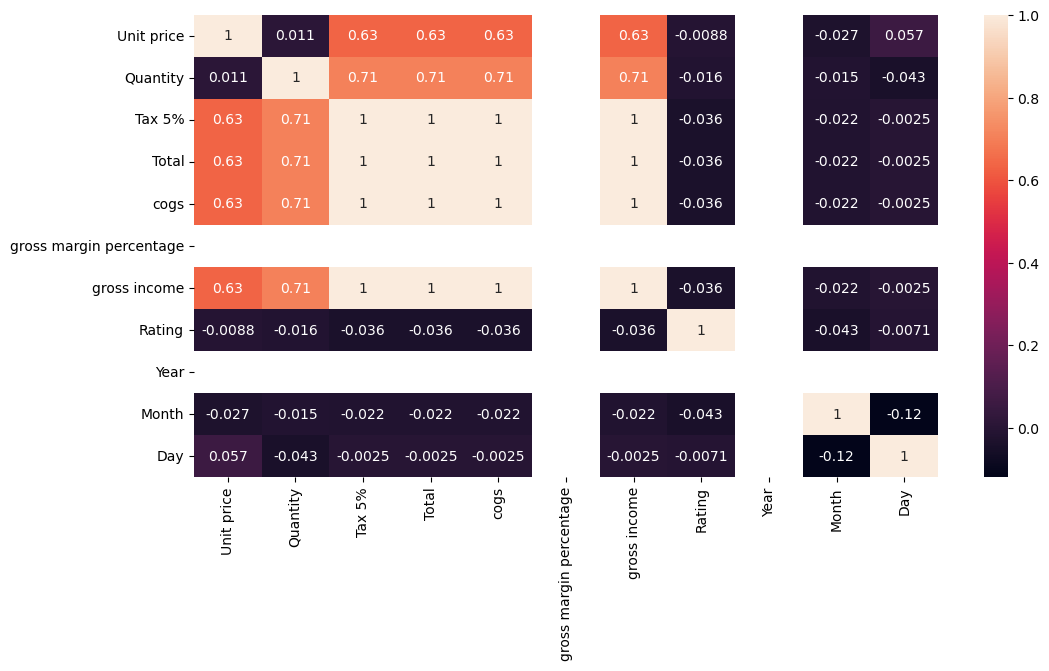

In [21]:
plt.figure(figsize = (12,6))
numer = df.select_dtypes('number')
sns.heatmap(numer.corr(),annot = True)

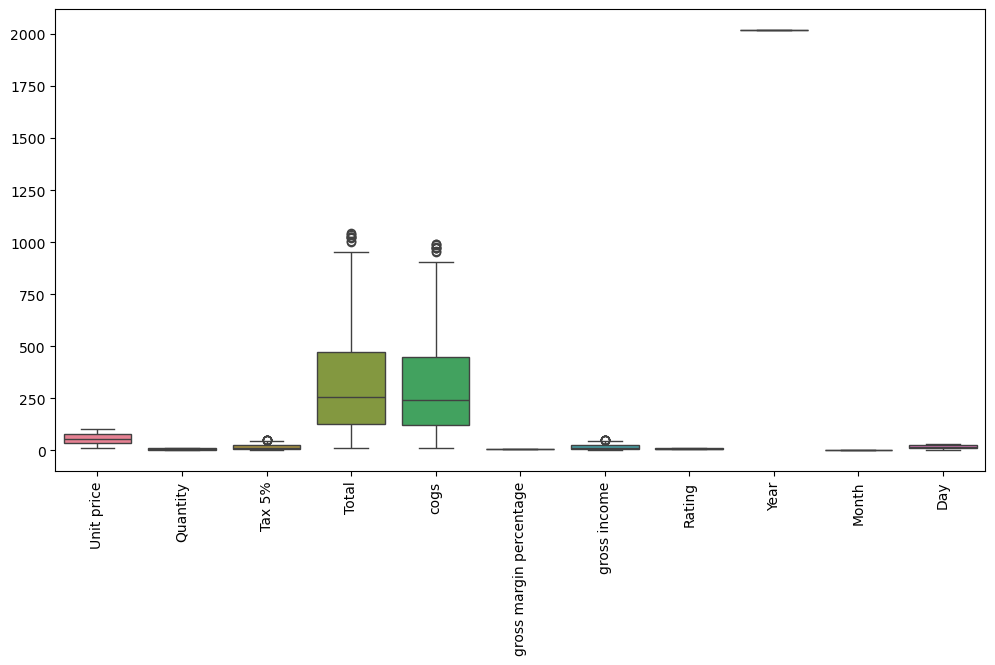

In [22]:
plt.figure(figsize = (12,6))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.show()

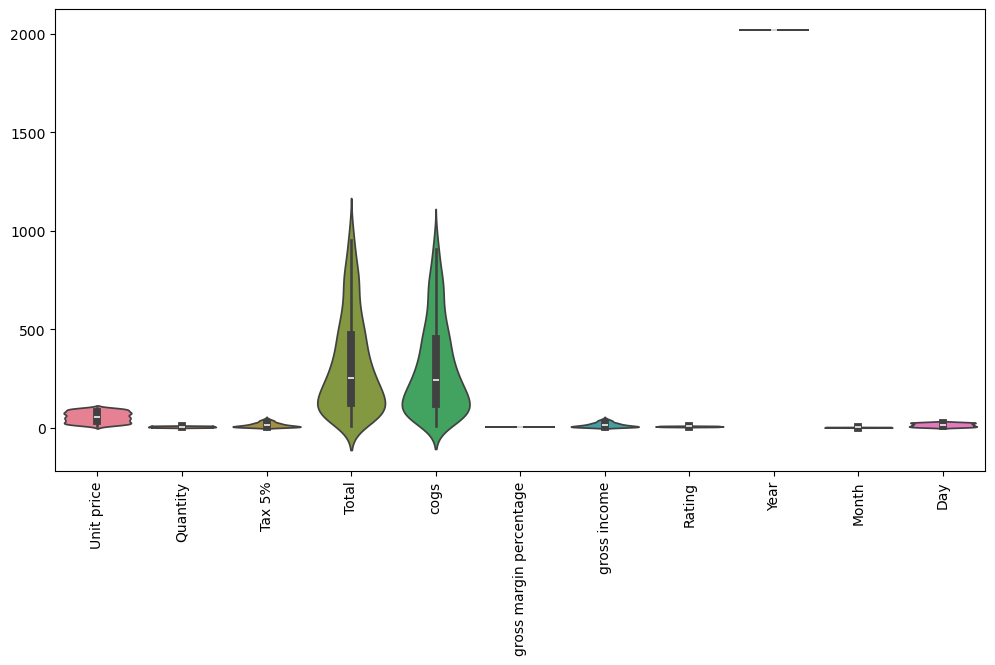

In [23]:
plt.figure(figsize = (12,6))
sns.violinplot(df)
plt.xticks(rotation = 90)
plt.show()

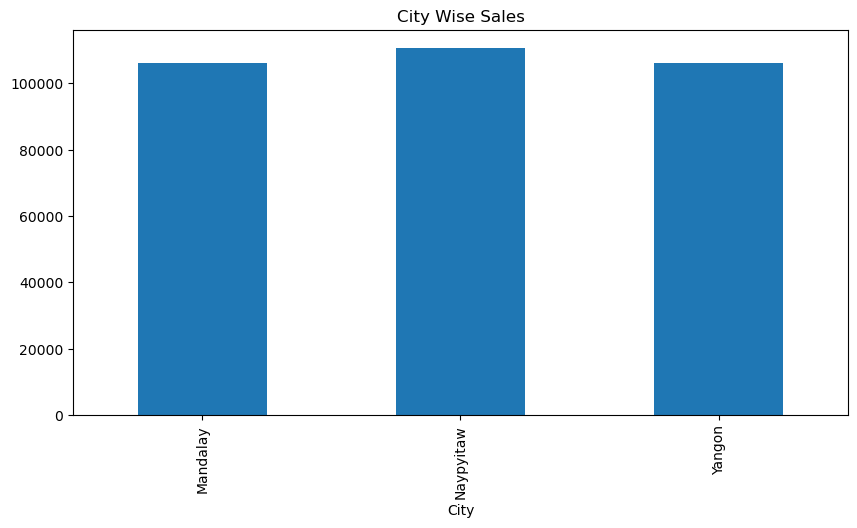

In [25]:
plt.figure(figsize = (10,5))
df.groupby('City')['Total'].sum().plot(kind = 'bar',title = 'City Wise Sales')
plt.savefig('City Wise Sales.png',dpi = 300)
plt.show()

Naypyidaw has recorded the highest sales, closely followed by the next two cities which have nearly identical figures.

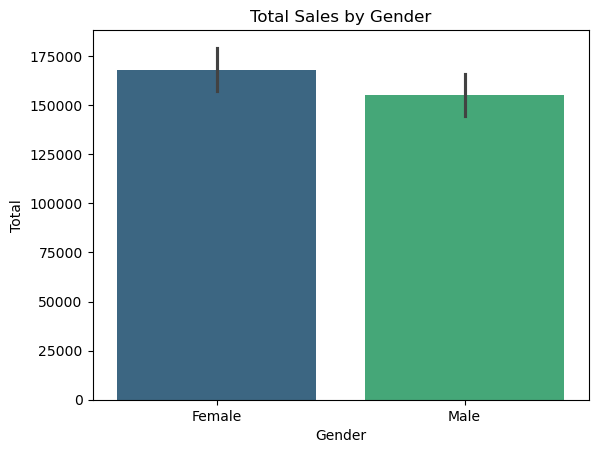

In [27]:
sns.barplot(x = 'Gender',y = 'Total',estimator = 'sum',palette = 'viridis',data = df)
plt.title('Total Sales by Gender')
plt.savefig('Total Sales by Gender.png',dpi = 500)
plt.show()

Most purchase was done by female

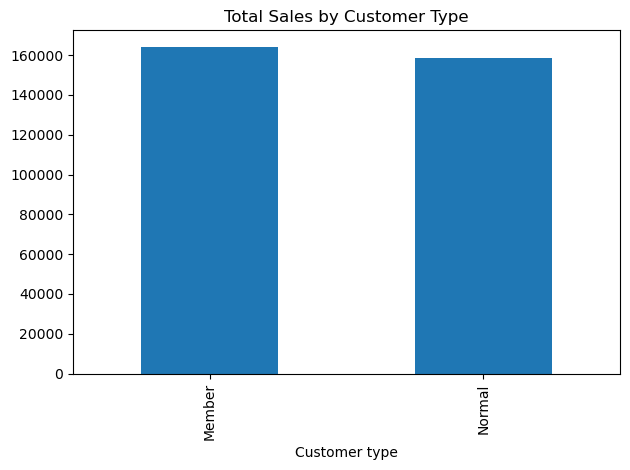

In [29]:
df.groupby('Customer type')['Total'].sum().plot(kind = 'bar',title = 'Total Sales by Customer Type')
plt.savefig('Total Sales by Customer Type.png',dpi = 300)
plt.tight_layout()
plt.show()

Members have a significantly higher total sales compared to non-members. This suggests that membership programs may be effective in encouraging increased spending among customers

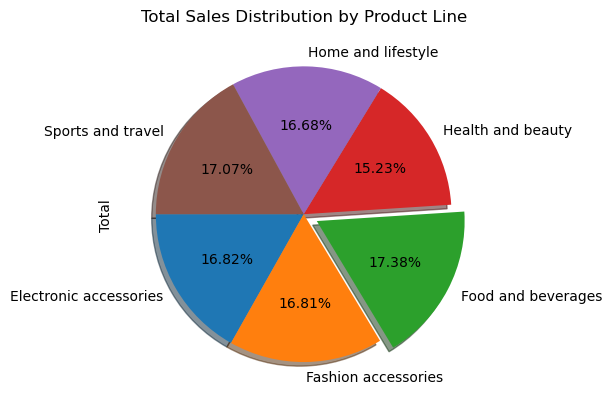

In [35]:
df.groupby('Product line')['Total'].sum().plot(kind = 'pie',explode = (0,0,0.1,0,0,0),shadow = True,autopct = '%.2f%%',startangle = 180,title = 'Total Sales Distribution by Product Line')
plt.savefig('Total Sales Distribution by Product Line.png',dpi = 1000)
plt.show()

* The "Food and Bevarages" product lline have the highest total sales
* "Health and Beauty" have the lowest sales

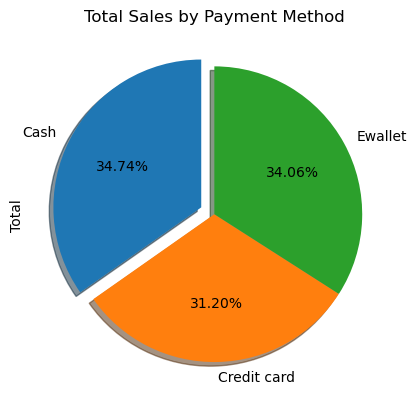

In [39]:
df.groupby('Payment')['Total'].sum().plot(kind ='pie',explode = (0.1,0,0),shadow = True,autopct = '%.2f%%',startangle = 90,title = 'Total Sales by Payment Method')
plt.savefig('Total Sales by Payment Method.png',dpi = 1000)
plt.show()

Both Cash and Ewallet contribute nearly equally to total sales, with Cash slightly leading by a fraction (34.74% for Cash vs. 34.06% for Ewallet). This suggests that customers are almost evenly split between preferring traditional cash payments and more modern digital wallets.

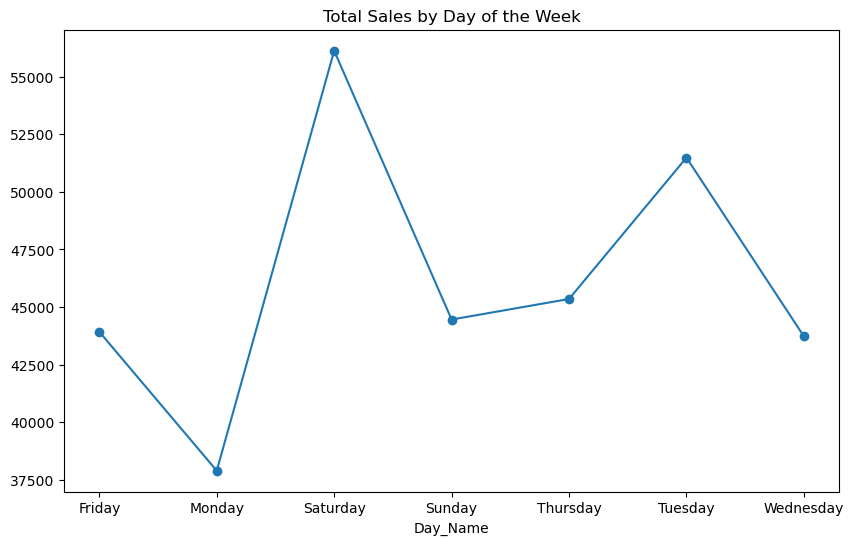

In [46]:
plt.figure(figsize = (10,6))
df.groupby('Day_Name')['Total'].sum().plot(x = 'Day_Name',y = 'Total',marker = 'o')
plt.title('Total Sales by Day of the Week')
plt.savefig('Total Sales by Day of the Week.png',dpi = 1000)
plt.show()

*  Highest Sales: Saturday has the highest sales, nearly reaching 50,000.

*  Lowest Sales: Monday has the lowest sales, just above 10,000.

*  Sales Variation: There is a significant variation in sales throughout the week, indicating different consumer behaviors or               promotional activities.

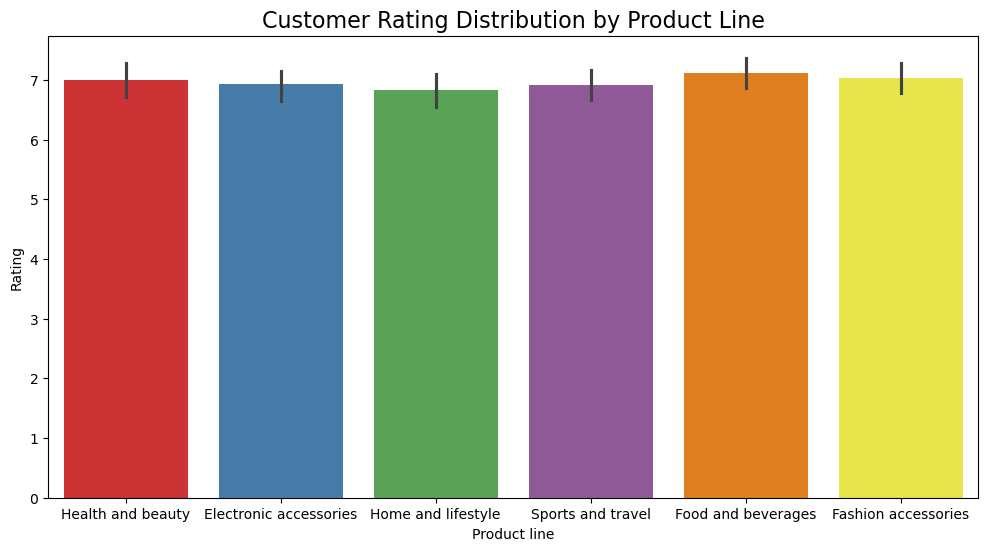

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Rating', data=df, palette="Set1")
plt.title('Customer Rating Distribution by Product Line', fontsize=16)
plt.savefig('Customer Rating Distribution by Product Line.png',dpi = 1000)
plt.show()

 All product lines have customer ratings in the range of approximately 7, indicating strong customer satisfaction across the board.